In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

# Created by Diana Janik and Jan Markiewicz

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_data_noise.npy')

In [4]:
xs = data[:,0]
ys = data[:,1]

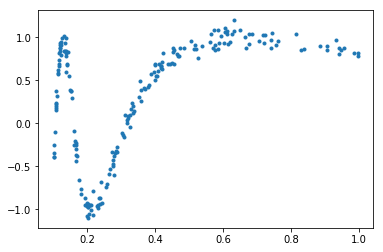

In [5]:
plt.plot(xs,ys,'.');

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(1,6),
                    torch.nn.ReLU6(), 
#                     torch.nn.Linear(6,2),
                    torch.nn.Dropout(0.01), 
#                     torch.nn.ReLU6(),
                    torch.nn.Linear(6,1))

In [9]:
# model = torch.load('model5.pt')
# model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=6, bias=True)
  (1): ReLU6()
  (2): Dropout(p=0.01, inplace=False)
  (3): Linear(in_features=6, out_features=1, bias=True)
)

In [10]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

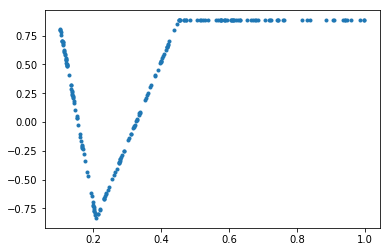

In [11]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [12]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [13]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [36]:
optimizer = torch.optim.Adam(model.parameters(),lr =0.00000006)

In [18]:
loss_func = torch.nn.MSELoss()
err_train=[]
err_valid=[]

In [38]:
%%time
for epoch in range(1000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.086411 0.084583 
CPU times: user 15.1 s, sys: 48.8 ms, total: 15.1 s
Wall time: 5.09 s


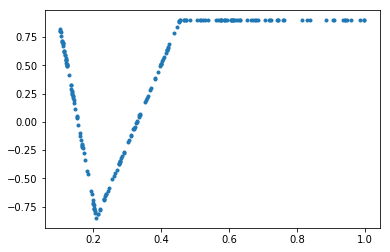

In [39]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

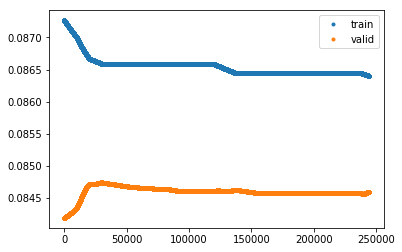

In [40]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

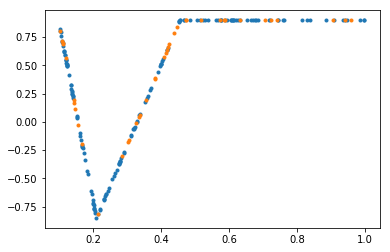

In [41]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [42]:
torch.save(model, "model5.pt")